## Algoritmo de Maximización de la Esperanza
#### Estudiantes: Dennis Luna Acuña- Graciela Rivera Picado - Luis Vargas Porras

### Libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy.stats import entropy
from scipy.stats import norm
from torch.distributions import normal
from torch.distributions import multivariate_normal
from scipy import stats 
import seaborn as sns 

### 1. Generate data with Gaussian distribution

*The data are artificially created with a 2-cluster Gaussian distribution with specific means and variances.*

Samples Class1
tensor([ 7.3618,  3.2100, -1.7827, -2.6656, -3.3383,  3.0345,  2.7596, -0.7526,
         9.0846,  8.6136,  2.8452,  5.7064,  0.3764,  5.2611, -0.9598, -3.3769,
         4.8618, -2.7772,  5.9403,  8.4415,  7.8478, 11.5381,  0.5982, 10.0183,
        -0.4056, -4.0930, -0.5977,  3.5046,  5.6636, 13.5921,  8.7169, 12.0419,
         9.4185,  8.2916,  5.6332, -1.7837,  3.2640,  4.1988,  4.1799, 10.3605,
         3.0977,  0.3709,  2.3617, 10.8614,  0.5340, -3.7223, -3.6204,  2.8938,
         0.2817, 11.9006,  5.3808, -2.0198,  2.5980,  5.4877, -0.0565,  6.2875,
         8.5808,  0.2852, -5.0087,  4.8597, -0.2918, -4.0411,  8.4371, -1.0108,
         9.7426, -0.2285, -3.7732,  1.1113,  3.7869,  7.6301, -6.4854,  2.9152,
        -3.5097,  1.4670,  2.5620,  8.7348,  7.7934,  1.8363,  1.1852,  0.0287,
        17.2641,  1.4820, -3.5004,  0.9297,  8.7501,  7.2957, -0.5996,  6.7321,
         1.7774,  7.2133,  3.9393,  4.3674, -0.9077,  0.5006, -5.4751,  7.9182,
         8.9418, -3.0056,

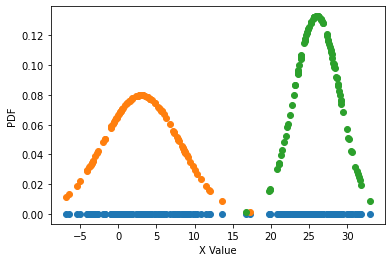

tensor([ 7.3618e+00,  3.2100e+00, -1.7827e+00, -2.6656e+00, -3.3383e+00,
         3.0345e+00,  2.7596e+00, -7.5265e-01,  9.0846e+00,  8.6136e+00,
         2.8452e+00,  5.7064e+00,  3.7640e-01,  5.2611e+00, -9.5975e-01,
        -3.3769e+00,  4.8618e+00, -2.7772e+00,  5.9403e+00,  8.4415e+00,
         7.8478e+00,  1.1538e+01,  5.9815e-01,  1.0018e+01, -4.0556e-01,
        -4.0930e+00, -5.9771e-01,  3.5046e+00,  5.6636e+00,  1.3592e+01,
         8.7169e+00,  1.2042e+01,  9.4185e+00,  8.2916e+00,  5.6332e+00,
        -1.7837e+00,  3.2640e+00,  4.1988e+00,  4.1799e+00,  1.0361e+01,
         3.0977e+00,  3.7087e-01,  2.3617e+00,  1.0861e+01,  5.3400e-01,
        -3.7223e+00, -3.6204e+00,  2.8938e+00,  2.8168e-01,  1.1901e+01,
         5.3808e+00, -2.0198e+00,  2.5980e+00,  5.4877e+00, -5.6460e-02,
         6.2875e+00,  8.5808e+00,  2.8521e-01, -5.0087e+00,  4.8597e+00,
        -2.9179e-01, -4.0411e+00,  8.4371e+00, -1.0108e+00,  9.7426e+00,
        -2.2848e-01, -3.7732e+00,  1.1113e+00,  3.7

In [6]:
def createDataOneClass(means, std, numberSamplesPerClass):
    normal_dist = torch.distributions.Normal(means,std)
    gaussian_sample = normal_dist.sample((numberSamplesPerClass,1)).squeeze()
    
    return gaussian_sample


def generate_data(numberSamplesPerClass, mean1, mean2 , stds1 , stds2 ):
    """
    Creates the data to be used for training, using a GMM distribution
    @param numberSamplesPerClass, the number of samples per class
    @param mean1, means for samples from the class 1
    @param mean2, means for samples from the class 2
    @param stds1, standard deviation for samples, class 1
    @param stds2, standard deviation for samples, class 2    """

    samplesClass1 = createDataOneClass(mean1, stds1, numberSamplesPerClass)
    samplesClass2 = createDataOneClass(mean2, stds2, numberSamplesPerClass)
    #Concatenates
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)

    # Plot Data
    y = np.zeros_like(samplesAll)
    plt.scatter(samplesAll,y)
    #plt.title('Plotting)
    plt.xlabel('X Value')
    plt.ylabel('PDF')

    #Plot densities Functions
    plt.scatter(samplesClass1, norm.pdf(samplesClass1, mean1, stds1))
    plt.scatter(samplesClass2, norm.pdf(samplesClass2, mean2, stds2))      
    
    plt.show()
    
    return (samplesAll)

'''
Creates data with gaussian distribution
'''

#Call Function generate Data
generate_data(numberSamplesPerClass=100, mean1=3.0, mean2=26.0, stds1=5.0, stds2=3.0)

#Hacer grafico donde x sean los datos y y las densidades(En proceso).

### 2. Create init_random_parameters

In [154]:
def init_random_parameters(K=2, range_mean = [1,10], range_std = [1,5]):
    
    np.random.seed(2)    
    
    mean = torch.randint(range_mean[0],range_mean[1],(K,1))
    std  = torch.randint(range_std[0], range_std[1],(K,1))  
    
    W = torch.cat((mean, std), 1)
    
    return W

#test

init_random_parameters(K=2, range_mean = [1,100], range_std = [1,10])

tensor([[57,  8],
        [17,  5]])

### 3. Likelihood Gaussian Observation Function

In [188]:
def calculate_likelihood_gaussian_observation(x_n, mu_1,mu_2,sigma_1,sigma_2):
    
    sample1=createDataOneClass(mu_1, sigma_1, x_n)
    sample2=createDataOneClass(mu_2, sigma_2, x_n)
    
    
    
    h_n=torch.cat((sample1, sample2), 0)
    
    s_l1=(torch.sub(h_n,mu_1))**2
    
    s_l2=(torch.sub(h_n,mu_2))**2
    
    #select_elements_l1=s_l1[b:x_n+b]
    
    select_elements_l1=s_l1[0:x_n]
    
    select_elements_l2=s_l2[0:x_n]
    
    
    pi = torch.tensor([np.pi])             
    
    sum_l1=torch.sum(select_elements_l1)
    
    sum_l2=torch.sum(select_elements_l2)
    
    sigma_1_inverso= -1 * (1 / (2 *((sigma_1)**2)))
    
    sigma_2_inverso= -1 * (1 / (2 *((sigma_2)**2)))
    
    
    # Superposition Principle 
    
    c1=(sigma_1_inverso * sum_l1) + (sigma_2_inverso * sum_l2)
    
    c2= ((x_n/2) * torch.log(2*pi))
    
    c3=(x_n*torch.log(torch.tensor([sigma_1]))) +  (x_n*torch.log(torch.tensor([sigma_2]))) 
    
  # likelihood_1 = (sigma_1_inverso * sum_l1) - ((x_n/2) * torch.log(2*pi)) - (x_n*torch.log(torch.tensor([sigma_1]))) 
    

   # likelihood_2 = (sigma_2_inverso * sum_l2) - ((x_n/2) * torch.log(2*pi)) - (x_n*torch.log(torch.tensor([sigma_2]))) 
    
    likelihood= c1-c2-c3
    
    print(likelihood)
   # print(select_elements_l2.shape)
    
    
    
calculate_likelihood_gaussian_observation(x_n=100,mu_1=10,mu_2=20,sigma_1=1.5,sigma_2=3)

tensor([-860.9399])
